# 2024 DFOS Curriculum

### Outline 
 This is a sketch of a possible short course, based on discussions by the 2023-2024 DFOS Alicia Working Group and the projects of the SRG 2023 Summer Intern program
 
 [ **Building Infrastructure Health Monitoring Systems With DFOS** ](https://docs.google.com/document/d/1p9bG9ok7YLM6nHOUZmzUS0pt6FY5twGX7JOXrjQDui0/edit#heading=h.6xgc0krord6p)

 #### Goal: Enable a class to build systems capable of demonstrating the truth of this statement: 
 *The system provides strain data every 4 inches (10 centimeters) with a spatial resolution of 3.3 feet (1 meter) and a strain precision of +20 µε and a temperature precision of +1.8° Fahrenheit (1°C).*

Provide students with programmable interrogators and a variety of existing fiber collection systems with existing historical data sets. In contrast to today's vendor-controlled environment, where the [Luna OBR-4600](https://lunainc.com/product/obr-4600) or the [Luna Quant-X](https://www.optasense.com/technology/quantx/) constrain users to Luna-provided visualizations and analysis, open systems allow freedom to explore in a rapidly changing environment . Explore tradeoffs of resolution, spatial accuracy, and precision, with freedom to configure fibers, lasers, photodetectors, and detector regimes for a variety of sensing challenges.

More deeply, provide students with the mathematical and computational skills to innovate as technology changes.

 
 **Approach**: Use the infrastructure of seven existing SRG  projects and published papers to build libraries of Jupyter-Notebook-enabled interrogators with RFSoC hardware. 
 <details open>
<summary>▶︎ Use existing SRG and CSI DFOS projects </summary>

<br>

1. [EBMUD Claremont Alicia interrogator](https://docs.google.com/document/d/1p9bG9ok7YLM6nHOUZmzUS0pt6FY5twGX7JOXrjQDui0/edit#heading=h.6xgc0krord6p)

2. [Richmond Field Station Fiber-In-Road Embedding](https://onlinelibrary-wiley-com.libproxy.berkeley.edu/doi/10.1002/stc.3067)

3. [UC Berkeley Geothermal Heat Pump boreholes](https://ce.berkeley.edu/news/2699)

4. [US Army Corps Levee embedding]

5. [Sea Level Rise: Alameda / CA Ground Water Well Monitoring]
]
6. [Wind Turbine Blade monitoring]

7. [Sea Bed / Acoustic Ocean]

8. Potential: [Electric power distribution] / [Battery temperature monitoring]
</details>
<br>

 <details>
 <summary>▶︎ Examine the technical components used by each project:</summary>

  + the physical infrastructure monitored; 
  + the desired monitoring values; 
+ the DFOS FUT physical structure; 
+ the interrogater component structure; 
+ vendors of optical, RF, power and computing components; 
  + future optical, RF, power components from vendors
  + vendor partnerships
+ desired interrogator parameters;  
+ computing and data storage elements; 
+ appropriate use of Brillouin, Raman, Rayleigh, or other data sources; 
  <br>
+ updated software stack; 
  <br>
+ the data acquisition and analysis logic. 
 </details>

 
 **Build or re-engineer** the interrogator technology using new **RFSoC** hardware and software. Use the existing sensor structure from each paper or ongoing project to test each solution.  This will entail moving existing code from MATLAB to Python, deciding on the appropriate Python libraries, building an sequence of Jupyter Notebooks to implement the new functionality, and designing the appropriate fabric of optical, RF, and computational components given the new capabilities of the **RFSoC** system.

 Spurred by the sudden availability of an [**unexpectedly powerful computational environment from the University of Strathclyde**](https://www.rfsocbook.com/), we suggest **reimplementing seven existing SRG research projects**  using the new, integrated, shared hardware and software environment provided by the RFSoC system: integrated parallel computation, FPGA, FFT, GPU, RF, photonics, and a software environment built on Jupyter Notebooks, Python, and hard-coded FPGA hardware support. 

<details>
 <summary> 
 
 ▶︎ ▶︎ **Immediate goal: pathways to 100X interrogator cost reduction**  </summary>
<br> 
 + Integration of FPGA and general computing at board level; photonics on CMOS; 
 + Brillouin, Raleigh, Raman multi-mode operation;  explore a variety of phase, polarity or frequency-scanning combinations. 
 
 + Huge market shift--from oil and gas, avionics to structural, biological, chemical, transport, process, power, geotechnical,RF and sonic infrastructure--based on 100X cost reduction.
 + Implement partnerships with constructors and builders, such as San Raphael *Redhorse Constructors*, to install DFOS on existing and new projects in anticipation of cheap interrogators
 + Embed fiber in every asphalt repaving project in every city and county
</details>


 In exploring each integration, use the existing project sensor infrastructure. Extend it, using new RFSoC communications capabilities, new data analysis environments, and new computational extensions. Substitute new hardware capabilities for prior computational workflows in sampling, spectrum analysis, and filtering.

 Accompany each reimplementation with an accompanying expanded curriculum: applied mathematics (linear algebra), signal processing, programming languages, photonics, spectrum  analysis, computational architecture, metamaterials, machine learning, testing and validation, and design.

 In each project, expand interrogator capabilities; explore Brillouin, Raleigh, Raman modes; expand temperature and strain measurements; integrate with digital twin environments; expand 3D visualization; explore ground-penetrating radar; 

### Example JN: Note: Computing Short FFT, then plotting power spectrum in waterfall plot; may take time to execute; wait for MyBinder to execute JN

In [2]:
# If system crashes, restart here to reload libraries
import numpy as np


In [3]:
import matplotlib.pyplot as plt

def stem_plot(x, y, title, xlabel, ylabel, xticks=None, yticks=None, figsize=(6, 3), subplot=(1, 1), bottom=None, style=None):
    fig = plt.figure(figsize=figsize)
    for idx, value in enumerate(y):
        axes = fig.add_subplot(subplot[0], subplot[1], idx+1)
        if bottom is not None:
            axes.stem(x[idx], y[idx], use_line_collection = True, bottom=bottom[idx])
        else:
            axes.stem(x[idx], y[idx], use_line_collection = True)
        if style is not None:
            if style[idx] == 'dashed':
                axes.plot(x[idx], y[idx], linestyle='dashed')
        axes.grid(True, which='major')
        if xticks is not None:
            axes.set_xticks(xticks[idx])
        if yticks is not None:
            axes.set_yticks(yticks[idx])
        axes.set_title(title[idx])
        axes.set_xlabel(xlabel[idx])
        axes.set_ylabel(ylabel[idx])
        plt.box(False)

In [4]:
# Set basic params
fs = 1024 # sample rate
f1 = 60 # frequency of first signal
f2 = 120 # frequency of 2nd signal
f3 = 250 # frequency of 3rd signal
N  = 512 # fft size

L = N*256 # we want 256 frames of 512 FFT windows

# create a sampled sinusoid and corresponding frequencies for plotting
sine_1 = np.sin(2*np.pi*f1*np.arange(L)/fs)
sine_2 = 0.5*np.sin(2*np.pi*f2*np.arange(L)/fs)
sine_3 = 0.7*np.sin(2*np.pi*f3*np.arange(L)/fs)

sum_of_tones = sine_1 + sine_2 + sine_3

In [5]:
sum_of_tones = sum_of_tones.reshape(-1,N)
sum_of_tones.shape

(256, 512)

In [6]:
# Compute FFT and calculate the PSD
X = np.fft.fft(sum_of_tones*np.hamming(N), N)[:,:int(N/2)]
Xlog = 10*np.log10(2*np.abs(X)**2/N)

# Get corresponding frequencies, take only positive spectrum
freqs = np.fft.fftfreq(N,1/fs)[:int(N/2)]

[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248. 250.
 252. 254. 256. 258. 260. 262. 264. 266. 268. 270. 272. 274. 276. 278.
 280. 282. 284. 286. 288. 290. 292. 294. 296. 298. 300. 302. 304. 306.
 308. 310. 312. 314. 316. 318. 320. 322. 324. 326. 328. 330. 332. 334.
 336. 338. 340. 342. 344. 346. 348. 350. 352. 354. 356. 358. 360. 362.
 364. 366. 368. 370. 372. 374. 376. 378. 380. 382. 384. 386. 388. 390.
 392. 

# This plot is computationally demanding: crashes small system; profile
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
im = plt.pcolormesh(freqs, np.arange(int(L/N))/fs, Xlog, vmin=-50, shading='gouraud')
ax.set_xlabel('Frequency, Hz')
ax.set_ylabel('Time, s')
ax.set_title('Waterfall Plot')
fig.colorbar(im)
plt.show()

/var/folders/zr/1lcy71z97n33bq1zyg3vtbp80000gn/T/ipykernel_55373/4018461594.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes.stem(x[idx], y[idx], use_line_collection = True)


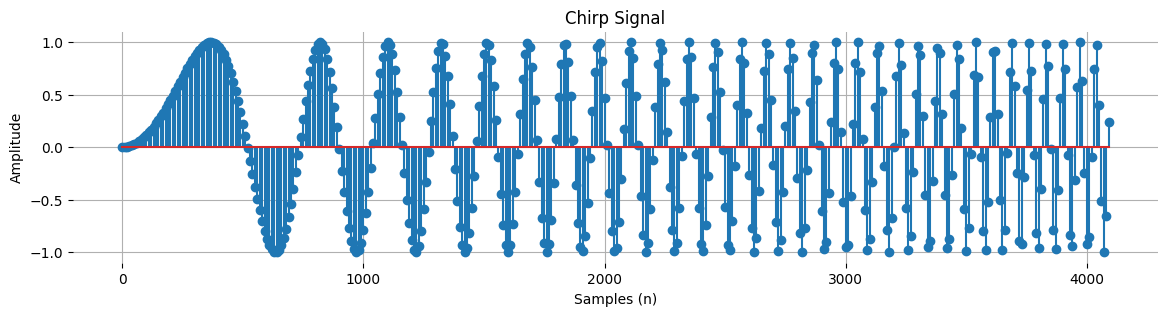

In [ ]:
# Set basic params
fs = 1024 # sample rate
N = 512 # fft size
L = N*256 # we want 256 frames of 512 FFT windows

# Frequency increases over time
f = 0.0019*np.arange(L)

# Create a sampled sinusoid and corresponding frequencies for plotting
chirp = np.sin(2*np.pi*f*np.arange(L)/fs)

# Plot the chirp signal
stem_plot(x      = [np.arange(0, 4096, 10)],
          y      = [chirp[:4096:10]],
          xticks = [np.arange(0, 4096, 1000)],
          figsize= (14, 3),
          title  = ["Chirp Signal"], 
          xlabel = ["Samples (n)"], 
          ylabel = ["Amplitude"])

# Slice it up into 512-sized chunks
chirp = chirp.reshape(-1,N)
chirp.shape

# Compute FFT and calculate the PSD
X = np.fft.fft(chirp*np.hamming(N), N)[:,:int(N/2)]
Xlog = 10*np.log10(2*np.abs(X)**2/N/fs)

# Get corresponding frequencies, take only positive spectrum
freqs = np.fft.fftfreq(N,1/fs)[:int(N/2)]

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
im = plt.pcolormesh(freqs, np.arange(int(L/N))/fs, Xlog, vmin=-50, shading='gouraud')
ax.set_xlabel('Frequency, Hz')
ax.set_ylabel('Time, s')
ax.set_title('Waterfall Plot')
fig.colorbar(im)
plt.show()

---
[### EBMUD Claremont Interrogator: Hayward Fault](https://docs.google.com/document/d/1p9bG9ok7YLM6nHOUZmzUS0pt6FY5twGX7JOXrjQDui0/edit#heading=h.6xgc0krord6p)

2024-January: **EBMUD Alicia: Phase 0; Retool interrogator: additional parameters**

Current system diagram; consolidation: Phase One; elimination of existing Picoscope; laser; photodiode; splitters; circulator; system simplification; sketch photonics integration pathway to extreme cost reduction; estimate market distribution, potential new sectors;

Insert rewritten and commented MATLAB code, with extended comments on FFT implementation; Brillouin Peaks found by frequency sweeps; details of centimeter resolution for temperature and microstrain

Explain spectrum and parameter settings: Signal to Noise Ratio; speed of light; strain; frequency scanning step;optical path length change;sampling rate; Nyquist zone; microstrain resolution; temperature resolution;

---
### Road surface (extend to permeable installations)
##### Create extension of proven fiber-melt-in-street to every ongoing asphalt resurfacing project in EBMUD service territory. Estimated 5-20 city blocks/week;

[2022-August: **Richmond Field Station: Road monitoring using asphalt-embedded distributed acoustic sensing (DAS): Real-time movement detection**](https://onlinelibrary-wiley-com.libproxy.berkeley.edu/doi/10.1002/stc.3067)

Explore overlapping video monitoring, water flow detection, lidar surface condition;

---
### Berkeley Geothermal Heating
[**Berkeley Geothermal Heating**](https://ce.berkeley.edu/news/2699)

[**Borehole Sensing**](https://news.berkeley.edu/2022/03/30/uc-berkeley-drills-400-foot-borehole-to-explore-geothermal-heating-on-campus/?utm_source=Berkeleyan&utm_campaign=5b467fe571-berkeleyan&utm_medium=email&utm_term=0_99ee3800d7-5b467fe571-389205568)

[**Seismic Sensor Network**](https://seismo.berkeley.edu/networks/index.html)

[**LBL FEM Geothermal Model**](https://catalog.data.gov/dataset/an-hpc-based-hydrothermal-finite-element-simulator-for-modeling-underground-geothermal-beh)

[**2021-Feb: Hydrothermal FEM; Treasure Island**](https://pangea.stanford.edu/ERE/pdf/IGAstandard/SGW/2021/Sun.pdf)




UC Berkeley Energy Sustainability: Boreholes and Heat Pumps

---
### Levees
[2023-March: **Application of Distributed Fiber Optic Sensing for Subsurface Levee Monitoring**](https://www.researchgate.net/publication/369497936_Application_of_Distributed_Fiber_Optic_Sensing_for_Subsurface_Levee_Monitoring)

Vertical monitoring of water levels; direct embedding in soil. Provide  readings  of  the  long-term  subsurface  strain  and temperature  fluctuations  along  the  landside  of  the  levee.

Extend to UC Davis Sacramento Levee measurement: 

---

### Sea Level Rise Monitoring
### Groundwater Monitoring

Design new monitoring of all California wells. Note large discrepency in groundwater extraction reports.

Couple with strong enforcement of [CA Sustainable Groundwater Management Act](https://water.ca.gov/Programs/Groundwater-Management/SGMA-Groundwater-Management/Groundwater-Sustainability-Plans) requirements for borehole monitoring.

[USGS View](https://ca.water.usgs.gov/sustainable-groundwater-management/groundwater-levels-california.html)

[CA Department of Water Resources: Live Groundwater and Wells](https://sgma.water.ca.gov/CalGWLive/#wells)

---
### Wind Turbines
[2023-August **Fiber Optic Vibration Monitoring of Offshore Wind Turbines**](https://www.researchgate.net/publication/372843188_A_Shake-Table_Test_to_Evaluate_Fiber_Optic_Vibration_Monitoring_of_Offshore_Wind_Turbines)

Optical Frequency Domain Reflectometry (OFDR) and Phase-based Time Domain Reflectometry

[2021-May: Dynamic structural health monitoring of a model wind turbine tower using distributed acoustic sensing (DAS)](https://www.researchgate.net/publication/351356524_Dynamic_structural_health_monitoring_of_a_model_wind_turbine_tower_using_distributed_acoustic_sensing_DAS)

---
### Seabed and Oceans
[**Distributed Acoustic Sensing on Oceans Observatories Initiative Regional Network**](https://oceanobservatories.org/pi-instrument/rapid-a-community-test-of-distributed-acoustic-sensing-on-the-ocean-observatories-initiative-regional-cabled-array/)

[**2023-February: Distributed acoustic sensing recordings of low-frequency whale calls**](https://pubs.aip.org/asa/jel/article/3/2/026002/2874322/Distributed-acoustic-sensing-recordings-of-low)

---
### Tunnels
[**Improve Tunnel Segmental Joint Crack Monitoring**](https://www.researchgate.net/profile/Chenjie-Gong/publication/317157076_Comparison_of_the_structural_behavior_of_reinforced_concrete_and_steel_fiber_reinforced_concrete_tunnel_segmental_joints/links/5bcd513f458515f7d9d0260b/Comparison-of-the-structural-behavior-of-reinforced-concrete-and-steel-fiber-reinforced-concrete-tunnel-segmental-joints.pdf)

---

# Building a curriculum based on implementing DFOS

---
## Adapting the RFSoC Textbook and Jupyter Notebooks for DFOS
**Chapter 4: DSP Fundamentals** : use existing project data acquisition to illustrate sampling rates, quantization, and aliasing problems. Explain the impact on spatial resolution of choice of sampling rates, quantization, and the interrelationship of strain and temperature.

Modify **Notebook Set B: DSP Fundamentals**, to explore ADC and DAC implementation; show filter impact on harmonics; explore sampling rates.

**Chapter 5: Spectral Analysis**: extend the discussion of FFT with examples of Brillouin and Rayleigh OTDR,  φ-OTDR, OFDR, and DAS

Modify **Notebook Set C** to explore time domain and frequency domain representatons of frames of data; use existing sets of field data from each published project as examples.  Explore DAC, ADC.  Explore FPGA implementations.

---


## 

First draft attempt: rewrite and annotate StrathClyde text with accompanying JN.
Retain links to original texts; 
Build doc for Github repository that links text to JN; expand areas that reference FFT sequence.  Establish unique DFOS parameters, derived from 

Side Note to be ignored:  Obsidan URL for the descriptive text from Soga, Liu, Chien et al: obsidian://open?vault=MainAction&file=Action%2FApplication%20of%20Distributed%20Fiber%20Optic%20Sensing%20for%20Subsurface%20Levee%20Monitoring

#### Exploring DFOS implementations using StrathClyde RFSoC hardware support
Picoscope replacement


---
**Software Defined Radio with Zynq UltraScale + RFSoC**
AMD; University of Strathclyde, Glasgow

www.RFSoCbook.com

ISBN 978-1-7395886-0-1

2023; 717 pages; 

https://www.RFSoCbook.com; 19 chapters; 9 Jupyter Notebooks

---

In [ ]:
### Quick how-to:  Retrieve book; JN

---
### Specific course topics
Signal processing fundamentals: sampling rate, quantizing, Nyquist 1; filters:low-pass;

Establishing characteristics of a specific fiber-optic cable: optical density: M, N

Testing and calibrating each cable: speed of light; 

Measurement of the Brillouin frequency of the backscattered light

Calculating the location of each measurement point for the backscattered signal using a time-of-flight calculation based on the speed of light in the fiber core. How to measure that speed.

Calculating **changes in the value of the Brillouin frequency peak** at each measurement point.

 ∆𝜈 = 𝑀∆𝜀 + 𝑁∆𝑇

 US Patent US20190195665A1; Use description to establish necessary interrogator parameters.

 *The system provides strain data every 4 inches (10 centimeters) with a spatial resolution of 3.3 feet (1 meter) and a strain precision of +20 µε and a temperature precision of +1.8° Fahrenheit (1°C).*
 ---

---
Relevant text 1:
**Optical Fibre Sensors-Fundamentals for Development of Optimized Devices**

Edited by Ignacio Del Villar,Ignacio R. Matiasz, 

**IEEE Press, John Wiley**

Identifiers: LCCN 2020020787 (print) | LCCN 2020020788 (ebook) | ISBN 9781119534761 (cloth) | ISBN 9781119534778 (adobe pdf) | ISBN 9781119534792 (epub)

https://onlinelibrary-wiley-com.libproxy.berkeley.edu/doi/epub/10.1002/9781119534730

**Chapter 4: Basic Detection Techniques**

Daniele Tosi 1,2 and Carlo Molardi 1

1 School of Engineering, Nazarbayev University, Astana, Kazakhstan

2 Laboratory of Biosensors and Bioinstruments, National Laboratory Astana Astana, Kazakhstan

**Chapter 5: Structural Health Monitoring Using Distributed Fibre‐Optic Sensors**

Alayn Loayssa

Department of Electrical, Electronic and Communications Engineering, Public University of Navarre, Pamplona, Spain

**Chapter 6: Distributed Sensors in the Oil and Gas Industry**

Arthur H. Hartog

Worthy Photonics Ltd, Winchester, UK

Overview

**Chapter 14: Fibre‐Optic Sensing: Past Reflections and Future Prospects**

Brian Culshaw 1 and Marco N. Petrovich 2

1 Department of Electronic and Electrical Engineering, University of Strathclyd, Glasgow, Scotland, UK

2 Optoelectronics Research Centre, University of Southampton, Southampton, UK


# Curriculum Projet Timeline

---
## Suggested timeline

**2024-January**

### Purchase three or four RFSoC systems, for use in reimplementing Alicia, in exploring new Alicia architectures, and in supporting a seminar or workshop or short-course for DFOS

1. Develop several pathways exploring techniques to move existing MATLAB code to the Jupyter and Python environment.
    - Use OpenAI, Microsoft, Github, Code Explorer to rewrite MATLAB in Python, Julia
    - Use interns, lower division, upper division, grads, PhD, Post-Doc, at different levels of computer sophistication, to rewrite code with aid of LLM, Anthropic, OpenAI, NVIDIA, Microsoft, Github tools

    
2. Elucidate the parameter-setting, testing and evaluation framework for specific implementations, eg, EBMUD Claremont, US Army Corp of Engineers, Schlumberger, UC Berkeley borehole heat pump installations

**2024-February-May**
Trials
---


# Software Porting to New Environment

# Can GPT-4 rewrite LinQing Luo's MATLAB code to use the RSFoC Environment?

---
## GPT-4 does quick look at MATLAB code for Alicia

instructor: 

In this MATLAB code, it appears the peak Brillouin frequency for each file is being computed by performing a short-time Fourier transform (STFT) and then finding the maximum frequency in the resulting frequency domain representation.

Let's break it down:

parfor fileidx = 1:numfile: This loop runs through each file where numfile is the total number of files.

data(:,fileidx);: This accesses the data corresponding to the fileidxth file.

reshape(I, [ReadingLength, FileAver]);: This reshapes the data from the file into a 2D-array, where each column corresponds to a different segment of the file.

PH_STFT(I, advance,ReadingLength,nFFT,FileAver);: This performs the short-time Fourier transform on the reshaped data. This will result in a time-frequency representation of the signal.

After looping through each file, the function collects the results to compute the mean spectrum using X_mean_dB = 10*log10((X_accum_folder./FileNum).^2);.

The mean spectrum is then processed further (flip, mean subtraction, resampling) to isolate the relevant features and to reduce noise.

The maximum frequency (peak) in the processed mean spectrum is then found using [X_peaks, I] = max(X_resamp, [], 1);, where X_resamp is the resampled mean spectrum.

brillouin_peaks = peakfreqs(I); pinpoints the Brillouin peaks at the locations of maximal frequency.

Finally, the Brillouin peak frequencies are plotted against distance using plot(distance/100, brillouin_peaks), and the results are saved (save(profilename,'brillouin_peaks','-v6');).

Note that the PH_STFT function is user-defined and isn't provided in the given MATLAB code, so I've speculated its functionality based on typical practice and the name of the function. STFT is a common method used in signal analysis to determine the frequency content of local sections of a signal as it changes over time.

This code essentially processes each file's data to extract the dominant (peak) Brillouin frequency for each segment of the signal, which is then used in the analysis and plotted for visual representation. These peaks represent the most significant frequency components in each section of the fiber, which can be directly linked to the physical properties (like temperature and strain) at the corresponding fiber location.

---

The digital signal from the fiber optic cable, which is an electrical signal converted from the optical signal passing through the cable, is likely to be processed by a Fourier Transform. The Fourier Transform is a mathematical tool that transforms a function of time, a time domain signal, into a function of frequency, called a frequency domain signal.

In simple terms, Fourier Transform breaks down the original signal into a set of sine and cosine waves of different frequencies. By identifying the frequency content of the signal, we can identify the characteristics of the signal and its components at each frequency. This is particularly useful in fiber optics where different frequencies can be associated with different data streams, enabling us to identify and isolate each one.

In the context of fiber optic sensors (e.g., distributed fiber optic sensing, DFOS), the "length" of fiber that a given datapoint represents can be determined by the speed of light (in the fiber) and the time of arrival of the backscattered signal. Each sampled data point in the signal acquisition can be mapped to a location in the fiber.

In Fourier Domain analysis of these signals, the frequencies present give us information about the variation of the physical parameter being measured (temperature, strain etc.) along the length of the fiber.

Please note that the MATLAB code snippet in question lacks detail on this processing. Additional understanding of the specific sensor system setup and its signal processing steps would be required for a precise explanation.

It's important to have a deep understanding of the system under consideration when interpreting the results of such data analyses - especially when assigning physical meaning to the frequency content of such signals.

User

## Use Github CoPilot

# Annotate RFSoC Jupyter Notebooks to compute peak Brillouin frequency for each EBMUD frequency scan
#### Create Jupyter Notebooks to run all Alicia analysis; add JN for phase analysis; Rayleigh, Raman
Do step-by-step explananation of process to extract the dominant (peak) Brillouin frequency for each segment of the signal, and how each segment corresponds to a specific location along the fiber

Example of Fourier analysis: show composition of square wave; generate the Fourier or complex Fourier elements that sum to square wave; later JN show spectrum analysis to get peak Brillouin energy

Write JN to apply to stored Alicia waveforms; waveforms for each segment are stored at what resolution? Sampled at what sampling frequency?

What does the python signal library contain?  What else?

Scipy  "integrate" contains "integrate.quad", used to calculate the first $a_0$ coefficient of the Fourier series; used again to integrate each sucsessive cosine or sine element

In [6]:
%pip install scipy
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from scipy import signal, integrate
import matplotlib.pyplot as plt
import numpy as np

Now, define a function for a square wave and plot it for inspection. The square wave will be characterised by the following:
* sample frequency $f_s$ of 1kHz,
* a fundamental period $T$ of 2$\pi$,
* an amplitude of 3,
* a DC bias of +3.

In [ ]:
def squarewave(x, amplitude=3, dcbias=3, phase=np.pi/4):
    return signal.square(x+phase)*amplitude+dcbias

fs = 1e3
x = np.arange(-2*np.pi, 2*np.pi, 1/fs)
plt.plot(x, squarewave(x), label='Square Wave', linestyle='dashed')
plt.ylim([-1, 7])
plt.xlim([-2*np.pi, 2*np.pi])
plt.xlabel('Phase (Radians)')
plt.ylabel('Amplitude')
plt.show()

In [1]:
from scipy import signal, integrate
import matplotlib.pyplot as plt
import numpy as np

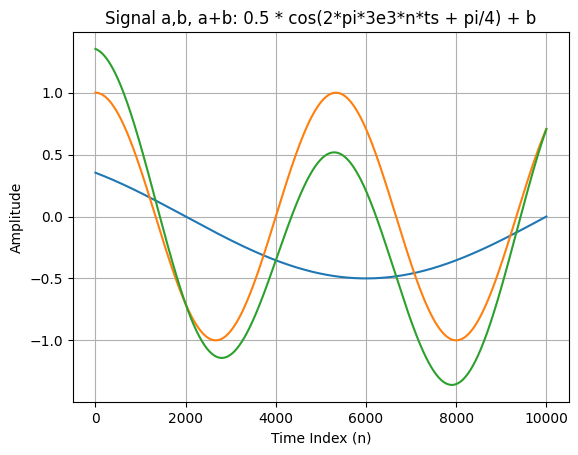

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Use this cell to play with the sampling rate, the sample size, the sampling frequency
# this plots the sum of two cosines, one at 3000Hz, one at 9000Hz
# the result is sampled at 48000Hz; higher sample rates zoom in
# Plot the cosine functions; break down why there is a pi/4 phase shift; 
# why 3000 x 16 x 1/48e3?

# Define time-related parameters
N= 10000 # the larger N, the more samples will plot
n = np.arange(0, N)  # Time index; how many samples to show

#ts = 1 / 10000  # Time step: #low frequency sampling#
#fs = 48e3 # Sampling frequency from JN: misses 9000 max
#fs = 96e3 # Sampling frequency
fs = 48e6 # Sampling frequency high

ts = 1/fs # Regular sampling period

# Define the signal equation
a = 0.5 * np.cos(2 * np.pi * 3e3 * n * ts + np.pi / 4)
#a = 0.5 * np.cos(2 * np.pi * 3e3 * n * ts )
b = np.cos(2*np.pi*9e3*n*ts)

# Plot the signal

plt.plot(n,a) #plot the 3000
plt.plot(n,b) #plot the 9000
plt.plot(n,a+b) #add the two cosines

plt.xlabel('Time Index (n)')
plt.ylabel('Amplitude')
plt.title('Signal a,b, a+b: 0.5 * cos(2*pi*3e3*n*ts + pi/4) + b')
plt.grid(True)
plt.show()


---
## Notes on specific hardware components of RFSoC to use in replacing current Alicia components
#### Spectrum Analyzer PYNQ

**A significant portion of the design has been implemented in the RFSoC's PL to prevent the PS from applying highly computational arithmetic. There is a spectrum analyser for each available RF ADC channel in the design. The spectrum Analysers are also interfaced to their very own flexible decimator, allowing different sample rates to be configured for each channel.**

